In [3]:
cd /home/mp6576/comp-class-2023/comp-lab-class-2023/Week4/Setup/WaterandIons_CHARMM36M/gromacs

/home/mp6576/comp-class-2023/comp-lab-class-2023/Week4/Setup/WaterandIons_CHARMM36M/gromacs


Plot saved to PDF successfully.


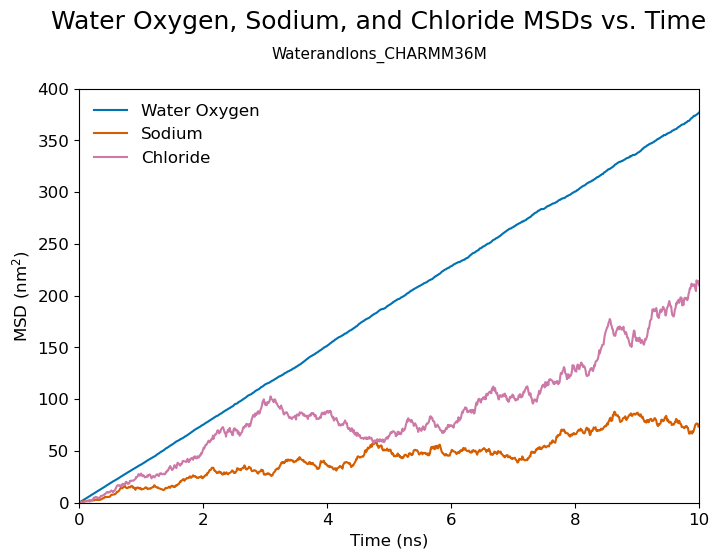

In [4]:
import mdtraj as md

xtc_file='Water-Ions_unwrapped.xtc'
gro_file='Water-Ions_unwrapped.gro'
traj=md.load(xtc_file,top=gro_file)

import numpy as np
import matplotlib.pyplot as plt

water_oxygen=traj.topology.select('name == O')
rmsd_water_oxygen=md.rmsd(traj, traj, 0, atom_indices=water_oxygen)
msd_water_oxygen=rmsd_water_oxygen**2
sodium_ions=traj.topology.select('name SOD')
rmsd_sodium_ions=md.rmsd(traj, traj, 0, atom_indices=sodium_ions)
msd_sodium_ions=rmsd_sodium_ions**2
chloride_ions=traj.topology.select('name CLA')
rmsd_chloride_ions=md.rmsd(traj, traj, 0, atom_indices=chloride_ions)
msd_chloride_ions=rmsd_chloride_ions**2

fig = plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.plot(traj.time/1000, msd_water_oxygen, color='#0072B2')
plt.plot(traj.time/1000, msd_sodium_ions, color='#D55E00')
plt.plot(traj.time/1000, msd_chloride_ions, color='#CC79A7')

plt.xlabel('Time (ns)', fontsize=12)
plt.ylabel('MSD (nm$^2$)', fontsize=12)

plt.text(x=0.5, y=0.9, s="Water Oxygen, Sodium, and Chloride MSDs vs. Time", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.85, s="WaterandIons_CHARMM36M", fontsize=11, ha="center", transform=fig.transFigure)

plt.subplots_adjust(top=0.8, wspace=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0, 10)
plt.ylim(0, 400)
plt.yticks(np.arange(0, 401, 50))

plt.legend(['Water Oxygen', 'Sodium', 'Chloride'], fontsize=12, frameon=False)

directory = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week4/Figures/WaterandIons_CHARMM36M/"
fname = "Week4Fig.4-Water Oxygen, Sodium, and Chloride MSDs.pdf"
full_dir = directory + fname

try:
    plt.savefig(full_dir, bbox_inches='tight')
    print("Plot saved to PDF successfully.")
except Exception as e:
    print(f"Error saving plot: {e}")
    print("File not saved")